In [1]:
import pandas as pd
df = pd.read_csv("TrazasHP_Eventos_Febrero.csv", delimiter=';')

In [2]:
level_filtered = df[df['Value.EventType'].str.contains('InicioNivelEvent') | df['Value.EventType'].str.contains('MuerteJugadorEvent') | df['Value.EventType'].str.contains('RecibirDanoEvent')]

from collections import defaultdict
# Guarda la vida perdida por run y por persona
lost_hp = defaultdict(list)
# Guarda los niveles que ha empezado por run y por persona
lvl_played_run = defaultdict(list)
# Al final se dividiran para extraer la vida perdida por nivel por run

run = 0
current_sid = ''
for ind in level_filtered.index:
    a = str(level_filtered['Name'][ind])
    if a not in current_sid:
        run = 0
        current_sid = a
        
    # Cada InicioNivelEvent suma un nivel al total en esa run
    if 'InicioNivelEvent' in level_filtered['Value.EventType'][ind]:
        # Cuando esta vacio o se aumenta de run, se hace un append a la lista
        if not lvl_played_run[a]:
            lvl_played_run[a].append(1)
        elif len(lvl_played_run[a]) is run:
            lvl_played_run[a].append(1)
        else:
            lvl_played_run[a][run] += 1
            
    elif 'RecibirDanoEvent' in level_filtered['Value.EventType'][ind]:
        if not lost_hp[a]:
            lost_hp[a].append(1)
        elif len(lost_hp[a]) is run:
            lost_hp[a].append(1)
        else:
            lost_hp[a][run] += 1
    
    # La unica manera de acabar la run es muriendo, asi se pasa a la siguiente
    elif 'MuerteJugadorEvent' in level_filtered['Value.EventType'][ind]:
        run += 1

In [3]:
# Estructura final que guarda vida perdida por nivel, con tantas entradas como runs
hp_level_runs = defaultdict(list)

for ind in lost_hp:
    aux = []
    if lvl_played_run[ind] and lost_hp[ind]:
        for i in range(0,len(lost_hp[ind])):
            aux.append(lost_hp[ind][i]/ lvl_played_run[ind][i])
        hp_level_runs[ind] = aux

In [ ]:
df_forms = pd.read_csv("TrazasHP_Forms_Febrero.csv", delimiter=';')
skills = df_forms[['Name','Value.Skill']].dropna()

skillsIDs = defaultdict(list)
for ind in skills.index:
    skillsIDs[skills['Name'][ind]].append(skills['Value.Skill'][ind])

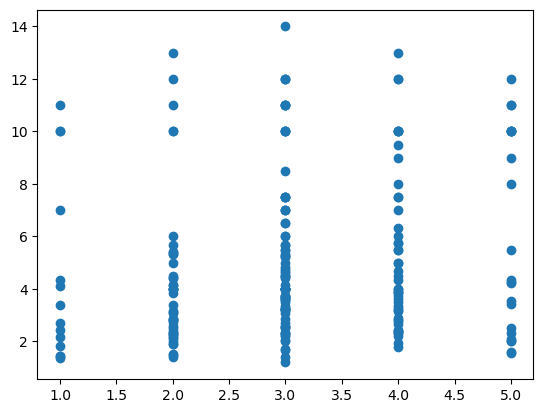

defaultdict(<class 'list'>, {'1136938727801755194': [6], '1170930898144137358': [27], '1348597222705622771': [26], '1669824004329016260': [26], '1754805883208873149': [5], '1954032360092724577': [13, 16, 20], '2079816969066347919': [28], '2593081460619558306': [35], '2635443620960614827': [21], '2929951246141652755': [4], '3188471634300217347': [15], '3462327010927419025': [20], '4493942792643359591': [33], '4790264683402568489': [43], '5485457927854277891': [33], '6137042090175494155': [35], '6509716804434035048': [15], '6611222696482831316': [29, 17, 14, 29, 17, 16, 25], '6743655186882880849': [12, 12, 14, 31], '6764646272537405998': [29], '6882348970292673073': [18, 13], '7578375308724127810': [13, 12], '7633398167979153821': [26], '7762211134769161437': [11, 26], '7961949740771509987': [18], '8093290578820947228': [8], '8130121790971488349': [10, 17, 15], '8419089351206198831': [1], '8489975859974970317': [10, 21, 27], '8559074508070845435': [31], '8960612724282952366': [11, 25, 48

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []

for ind in skillsIDs:
    for i in range(0,len(skillsIDs[ind])):
        if skillsIDs[ind] and hp_level_runs[str(ind)]:
            x.append(skillsIDs[ind][i])
            y.append(hp_level_runs[str(ind)][i])
        
plt.scatter(x,y)
plt.show()

# MEDIAS DE CADA RESPUESTA AL FORMS
print(lost_hp)